# Melina H

-----

#### <font color='blue'>This task is about predict the traffic on a new mode of transport.</font> 

Components of Time Series:

**Trend:** Trend is a general direction in which something is developing or changing. So we see an increasing trend in this time series. We can see that the passenger count is increasing with the number of years. Let’s visualize the trend of a time series.

**Seasonality:** Another clear pattern can also be seen in the above time series, i.e., the pattern is repeating at regular time interval which is known as the seasonality. Any predictable change or pattern in a time series that recurs or repeats over a specific time period can be said to be seasonality. Let’s visualize the seasonality of the time series.

<font color='blue'>**Difference between a time series and regression problem**</font>

Here you might think that as the target variable is numerical it can be predicted using regression techniques, but a time series problem is different from a regression problem in following ways:

The main difference is that a time series is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
Along with an increasing or decreasing trend, most Time Series have some form of seasonality trends,i.e. variations specific to a particular time frame.
So, predicting a time series using regression techniques is not a good approach.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

___________

Imo it's best to start, is setting upp the hypothesis for this task before starting. Or parameters that can affect the outcome. 

$\mu{_1} :=$ Diffrent in traffic depends on which day (Week days vs. weekends)

$\mu{_2} :=$ Diffrent in traffic during the seasons (summer vs. vinter)

$\mu{_3} :=$ Peaks at certains hours (work, collage etc..)

We have the hypothesis beacuse: 

- To make interpretations about the target variable.

- To list out the features on which our target variable might depend.

- To make view about the problem based on the domain knowledge.

In [84]:
import pandas as pd          
import numpy as np          
import matplotlib.pyplot as plt  
from datetime import datetime    
from pandas import Series         
%matplotlib inline 

In [85]:
path = "/Users/Melina/Desktop/DSDS/"
train = pd.read_csv(path + "Train_SU63ISt.csv")
#train if we want to plot it

In [86]:
path = "/Users/Melina/Desktop/DSDS/"
test = pd.read_csv(path + "Test_0qrQsBZ.csv")
#test if we want to plot it

In [119]:
#If we want to drop variable, or do something with the data set, i prefer to make a copy before
train_copy= train.copy()
test_copy=test.copy()

In [88]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [89]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

So here in **train** we have ID, date time, count of passengers.
In **test** we have ID and date time only, and that's might be beacuse we have to predict the count for the test file.

Then we want to see what kind of data we have in our dataset, using this command:

In [90]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [91]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [92]:
train.shape

(18288, 3)

In [93]:
test.shape

(5112, 2)

We will extract the time and date from the datetime. We have seen earlier that the data type of Datetime is object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

In [94]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 

test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 

train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [95]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 


In [96]:
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [97]:
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 

We made some hypothesis for the effect of hour, day, month and year on the passenger count. So, let’s extract the year, month, day and hour from the Datetime to validate our hypothesis.



In [98]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

We made a hypothesis for the traffic pattern on weekday and weekend as well. So, let’s make a weekend variable to visualize the impact of weekend on traffic.

- We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.

- Values of 5 and 6 represents that the days are weekend.

In [99]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend.



In [100]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

Let’s look at the time series.



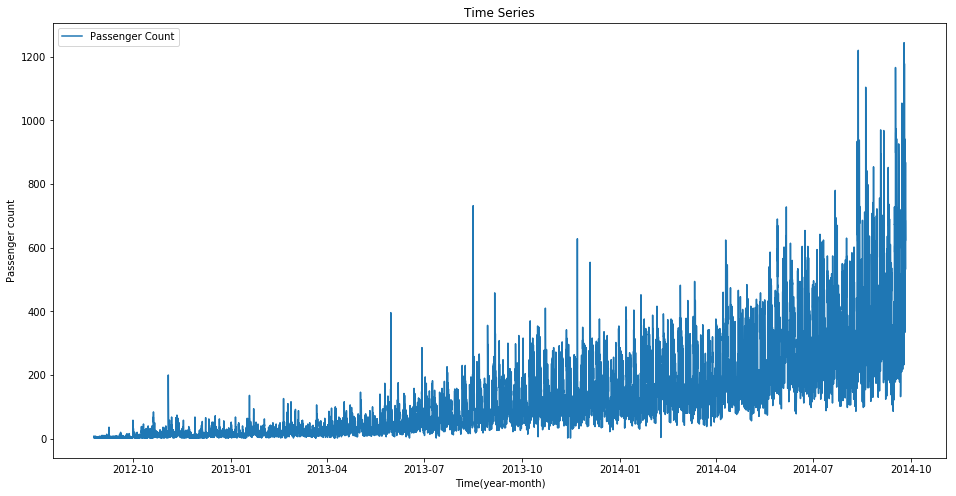

In [101]:
train.index = train["Datetime"] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

We will work on the train file for all the analysis and will use the test file for forecasting.

# <font color='red'>SE UPP MED DESSA!!!!!!</font> 

Lets recall the hypothesis that we made earlier:

Traffic will increase as the years pass by
Traffic will be high from May to October
Traffic on weekdays will be more
Traffic during the peak hours will be high

After having a look at the dataset, we will now try to validate our hypothesis and make other inferences from the dataset.

----------
Let us try to verify our hypothesis using the actual data.

Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

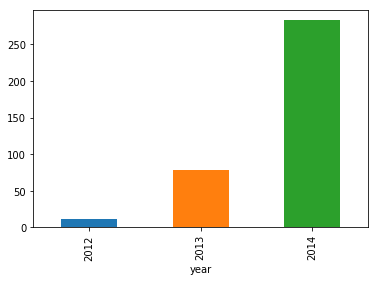

In [102]:
train.groupby('year')['Count'].mean().plot.bar()

We see an exponential growth in the traffic with respect to year which validates our hypothesis.

Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

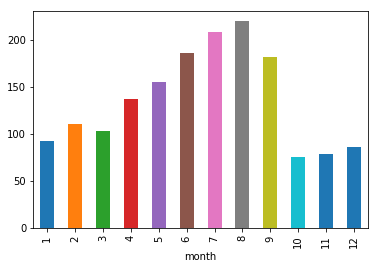

In [103]:
train.groupby('month')['Count'].mean().plot.bar()

Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

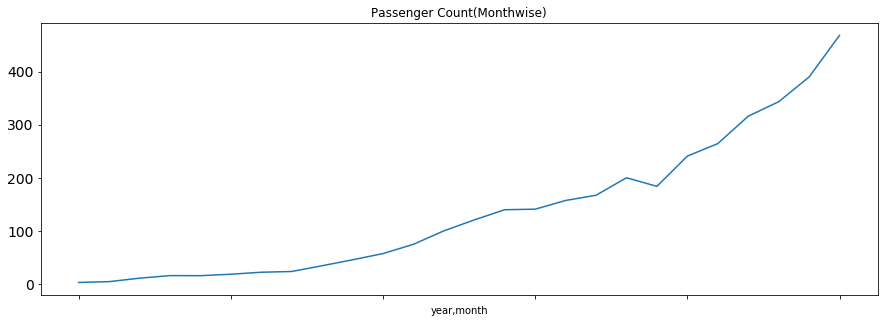

In [104]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

- We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.
Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

- In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.


Let’s look at the daily mean of passenger count.

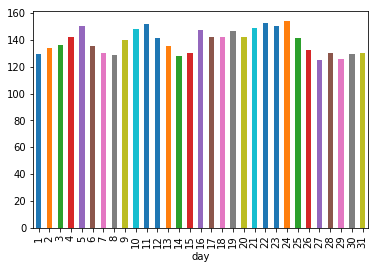

In [105]:
train.groupby('day')['Count'].mean().plot.bar()

We are not getting much insights from day wise count of the passengers.

We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

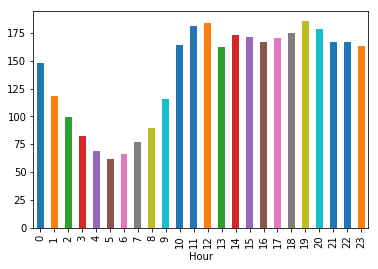

In [106]:
train.groupby('Hour')['Count'].mean().plot.bar()

- It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
- After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.
Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

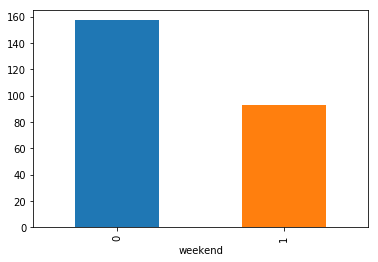

In [107]:
train.groupby('weekend')['Count'].mean().plot.bar()

t can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

Now we will try to look at the day wise passenger count.

Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

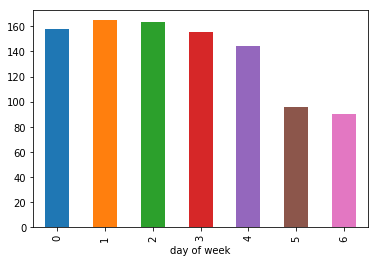

In [108]:
train.groupby('day of week')['Count'].mean().plot.bar()

From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week. Now we will look at basic modeling techniques. Before that we will drop the ID variable as it has nothing to do with the passenger count.

In [109]:
train=train.drop('ID',1)


# skit bias

In [110]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


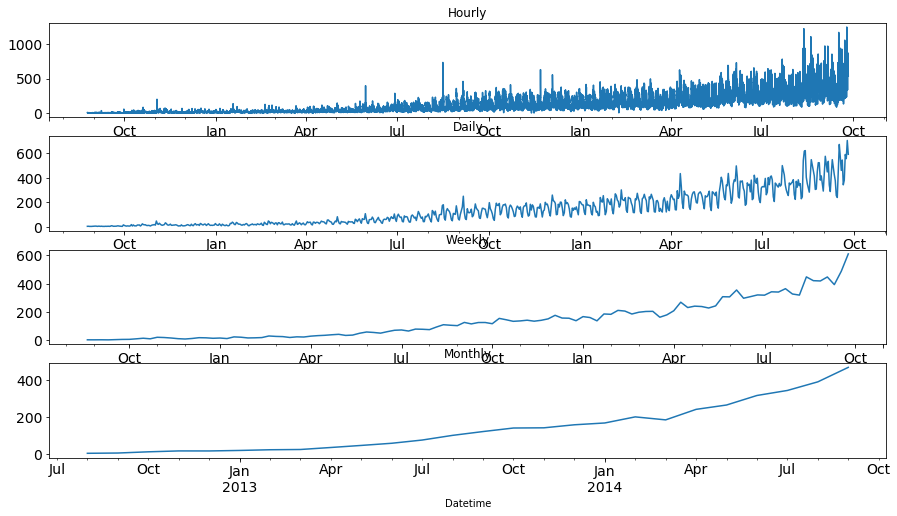

In [111]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [112]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


#wtf

_______

As we have validated all our hypothesis, let’s go ahead and build models for Time Series Forecasting. 

But before we do that, we will need a dataset(validation) to check the performance and generalisation ability of our model. Below are some of the properties of the dataset required for the purpose.

The dataset should have the true values of the dependent variable against which the predictions can be checked. Therefore, test dataset cannot be used for the purpose.

The model should not be trained on the validation dataset. Hence, we cannot train the model on the train dataset and validate on it as well.

So, for the above two reasons, we generally divide the train dataset into two parts. One part is used to train the model and the other part is used as the validation dataset. 

In [113]:
#The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


We have done time based validation here by selecting the last 3 months for the validation data and rest in the train data. If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset.

Lets understand it in this way: If we choose the split randomly it will take some values from the starting and some from the last years as well. It is similar to predicting the old values based on the future values which is not the case in real scenario. So, this kind of split is used while working with time related problems.

Now we will look at how the train and validation part has been divided.



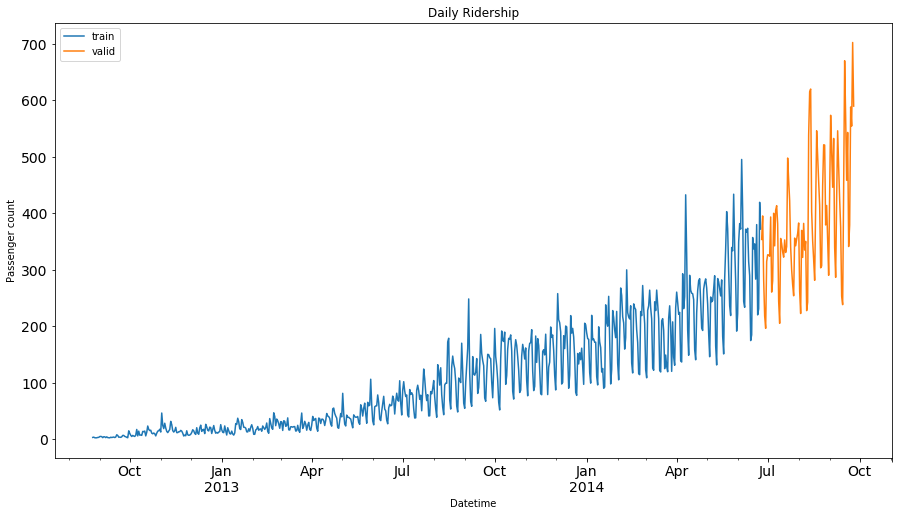

In [114]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

Here the blue part represents the train data and the orange part represents the validation data.

We will predict the traffic for the validation part and then visualize how accurate our predictions are. Finally we will make predictions for the test dataset.

### <font color="blue">Naive Approach forecasting</font>
In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.

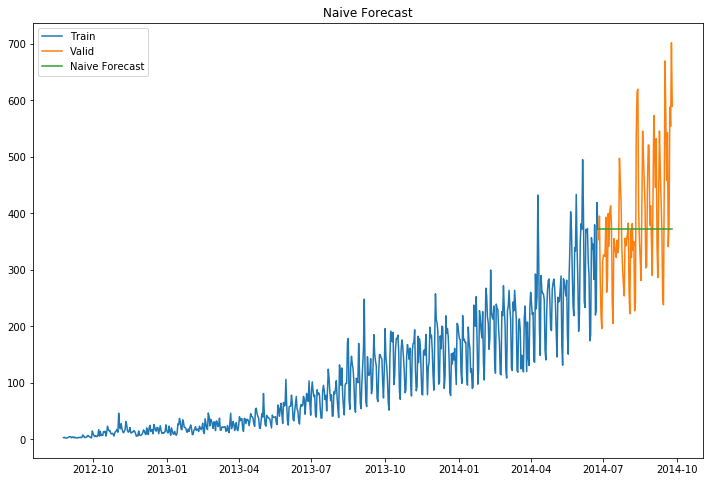

In [115]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

We can calculate how accurate our predictions are using rmse(Root Mean Square Error).
Residuals are a measure of how far from the regression line data points are.


In [116]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


Lower values of RMSE indicate better fit. So this is not so good. 

# <font color='blue'>ARIMA model</font>
with paramaters $(p,d,q)$

where 

$p$ = numbers of features 

$d$ = the degree of differencing

$q$ = the order of moving the average model.


And as always we need to check if it is stationary: 
We use Dickey Fuller test to check the stationarity of the series.
The intuition behind this test is that it determines how strongly a time series is defined by a trend.
The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).
The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

In [117]:
from statsmodels.tsa.stattools import adfuller 

def test_stationarity(timeseries): #Determing rolling statistics
    train.index = train["Datetime"] # indexing the Datetime to get the time period on the x-axis. 
    df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
    ts = df['Count'] 
    rolmean = ts_log.rolling(timeseries, window=24).mean() #24h per day
    rolstd = pd.rolling_std(timeseries, window=24)
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

KeyError: 'Datetime'

If test statistic < critical value, the statistics shows that the time series is stationary, 

We will try to make the data more stationary. For doing so, we need to remove the trend and seasonality from the data.

But i don't know why they can't see the dictionary here. 